In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Import needed packages for classification
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Import packages for visualization of results
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

# Iport packages for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
# Read data, clean up names

beans = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Ch9-Supervised-Learning/Data/Dry_Bean_Dataset.csv')
print(beans.head())
beans['Class'] = beans['Class'].str.capitalize()
print(beans.shape)
beans.describe()
beans

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,Seker
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,Seker
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,Seker
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,Seker
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,Seker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,Dermason
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,Dermason
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,Dermason
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,Dermason


In [30]:
# Initialize model
beanKnnClassifier = KNeighborsClassifier(n_neighbors=5)
# Split data
X = beans[['MajorAxisLength', 'MinorAxisLength']]
y = beans[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#StandardScaler stanndardizes each feature to have a mean of 0 and a standard
#deviation of 1, ensuring all features contribute equally.
print(X_train_scaled)
print(y_train)
print(type(y_train))

[[-1.02991165 -0.23692861]
 [-1.40909092 -1.40301919]
 [-0.59440954  0.06941239]
 ...
 [-0.67483471 -0.74100776]
 [-1.15417052 -0.3332148 ]
 [ 0.46973766 -0.60202139]]
          Class
256       Seker
10082  Dermason
1589      Seker
4523       Cali
6177      Horoz
...         ...
6582      Horoz
10633  Dermason
7456       Sira
61        Seker
6019      Horoz

[9527 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [33]:
# Train model and make predictions for the test set.
print(np.ravel(y_train))
print(type(np.ravel(y_train))) #dataframe --> one dim array
print('********************************')

beanKnnClassifier.fit(X_train_scaled, np.ravel(y_train))

y_pred = beanKnnClassifier.predict(scaler.transform(X_test))
y_pred

['Seker' 'Dermason' 'Seker' ... 'Sira' 'Seker' 'Horoz']
<class 'numpy.ndarray'>
********************************


array(['Seker', 'Sira', 'Bombay', ..., 'Horoz', 'Cali', 'Cali'],
      dtype=object)

In [34]:
# Predict one bean
bean = pd.DataFrame(data={'MajorAxisLength':[ 400], 'MinorAxisLength': [200]}) #You are creating a dictionary!
#print(bean)
#print(scaler.transform(bean))
print(beanKnnClassifier.predict(scaler.transform(bean)))

['Horoz']


In [35]:
#Another way to predict one bean
bean = [[400,200]]
beanKnnClassifier.predict(scaler.transform(bean))
#warning --> as bean does not have column/feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Horoz'], dtype=object)

## Zybook made a mistake --> please use the following code:

The correct usage is:
- accuracy_score(y_test, y_pred)
- confusion_matrix(y_test, y_pred)

In [22]:
# Compute metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.8697355533790402
[[287   0  97   0   2   4  14]
 [  0 149   0   0   0   0   0]
 [ 67   0 387   0  13   0   3]
 [  0   0   0 975   1  13  59]
 [  7   0  13   2 530   0  22]
 [  6   0   0  22   0 594  23]
 [  9   0   3 131  10  11 630]]


### if you want to see the model's classes  (useful for confusion matrix)

In [23]:
beanKnnClassifier.classes_

array(['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'],
      dtype=object)

# Visualizing the regions of classification

In [11]:
# Take a sample to keep runtime low while seeing what areas are classified as each bean
beanSample = beans.sample(200, random_state=123)
beanSample.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,54127.990000,865.381605,324.575264,202.770531,1.599216,0.758134,54884.245000,255.138392,0.749011,0.986699,0.868323,0.795476,0.006565,0.001682,0.636377,0.994809
std,30512.573123,225.933495,89.417657,46.635806,0.245734,0.085995,30943.202531,61.979882,0.049709,0.005112,0.062621,0.060103,0.001155,0.000596,0.095587,0.004285
min,22726.000000,550.994000,203.892624,142.389986,1.105963,0.427131,23071.000000,170.104797,0.588422,0.956634,0.670689,0.664848,0.003293,0.000700,0.442023,0.969040
25%,36224.750000,704.808250,256.953182,173.406526,1.431583,0.715583,36561.750000,214.761800,0.713677,0.985245,0.819555,0.759451,0.005897,0.001120,0.576766,0.993542
50%,45035.500000,798.344000,298.759333,191.330168,1.570727,0.771155,45534.500000,239.459747,0.758957,0.988034,0.879373,0.796584,0.006696,0.001651,0.634546,0.996236
75%,63414.750000,981.381000,383.678223,216.577589,1.722959,0.814333,64208.000000,284.151661,0.786572,0.989729,0.917764,0.834575,0.007363,0.002170,0.696515,0.997552
max,191042.000000,1693.703000,648.057449,389.461020,2.241201,0.894939,193440.000000,493.195934,0.840000,0.993906,0.986812,0.949719,0.008972,0.003127,0.901966,0.999674


In [12]:
# Create integer-valued labels for plot_decision_regions()
beanSample['Int'] = beanSample['Class'].replace(
    to_replace = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'],
    value = [int(0), int(1), int(2), int(3), int(4), int(5), int(6)])

# Define input and output features
X = beanSample[['MajorAxisLength', 'MinorAxisLength']]
y = beanSample[['Int']]

# Fit model
beanKnnClassifier.fit(X, np.ravel(y))

/tmp/ipython-input-2426787335.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  beanSample['Int'] = beanSample['Class'].replace(


KNeighborsClassifier()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


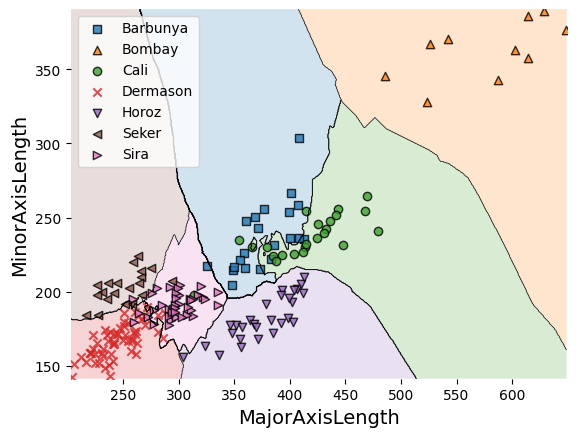

In [13]:
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=beanKnnClassifier, contourf_kwargs=contourf_kwargs)

# Add title and axis labels
p.set_xlabel('MajorAxisLength', fontsize=14)
p.set_ylabel('MinorAxisLength', fontsize=14)

# Add legend
L = plt.legend()

L.get_texts()[0].set_text('Barbunya')
L.get_texts()[1].set_text('Bombay')
L.get_texts()[2].set_text('Cali')
L.get_texts()[3].set_text('Dermason')
L.get_texts()[4].set_text('Horoz')
L.get_texts()[5].set_text('Seker')
L.get_texts()[6].set_text('Sira')